In [1]:
#Step 1 unnecessary warnings during code execution
import warnings
warnings.filterwarnings('ignore')

#step 2 import pandas and numpy 
import pandas as pd
import numpy as np

# deciding decimal places
np.set_printoptions(precision=4,linewidth=100)

#matplot library for display data in graphical format
import matplotlib.pyplot as plt

In [2]:
# step 3 import datafile and storing it into pandas dataframe(Always)
Stock_df=pd.read_csv('stock.csv')
Stock_df.head(10)

,Date,hdfc,asian paint,Nifty
0,1-Apr-20,1583.50,1603.20,8253.80
1,3-Apr-20,1499.55,1520.90,8083.80
2,7-Apr-20,1555.15,1623.80,8792.20
3,8-Apr-20,1558.80,1608.95,8748.75
4,9-Apr-20,1703.10,1651.35,9111.90
5,13-Apr-20,1655.20,1680.85,8993.85
6,15-Apr-20,1596.30,1718.20,8925.30
7,16-Apr-20,1625.75,1743.10,8992.80
8,17-Apr-20,1680.60,1756.25,9266.75
9,20-Apr-20,1727.70,1730.45,9261.85


In [3]:
# step 4 information of data
Stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         249 non-null    object 
 1   hdfc         249 non-null    float64
 2   asian paint  249 non-null    float64
 3   Nifty        249 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


Text(0, 0.5, 'hdfc')

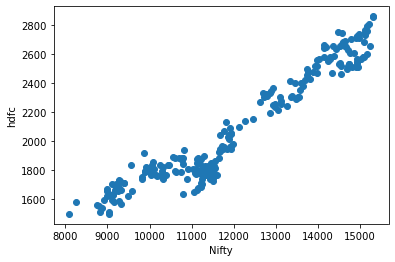

In [4]:
# Step 5 importing Libraries for plotting the data (first Assumtionn of LR model is linearity bet x and y)
plt.scatter(Stock_df['Nifty'],Stock_df['hdfc'])
plt.xlabel('Nifty')
plt.ylabel('hdfc')

In [5]:
# Step 6 importing statmodel
import statsmodels.api as sm

#step 7 x is defined as independent variable (feature)
X=sm.add_constant(Stock_df['Nifty'])
X.head(5)

,const,Nifty
0,1.0,8253.80
1,1.0,8083.80
2,1.0,8792.20
3,1.0,8748.75
4,1.0,9111.90


In [6]:
#Step 8 Y is definded as dependent variable (Target variable)
y=Stock_df['hdfc']
y.head(5)

0    1583.50
1    1499.55
2    1555.15
3    1558.80
4    1703.10
Name: hdfc, dtype: float64

In [7]:
# Step 9 importing library sklearn for ML model
from sklearn.model_selection import train_test_split

In [8]:
# step 10 splitting dataset into train and test set
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=100)

In [9]:
#step 11 fitting linear model equation
hdfc_lm=sm.OLS(train_y,train_X).fit()

In [10]:
#step 12 printing result of linear regression model
print(hdfc_lm.params)

const   -146.642917
Nifty      0.185496
dtype: float64


In [11]:
#step 13 summary result of all the statistics of linear regression
hdfc_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hdfc   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2041.
Date:                Sat, 29 Jan 2022   Prob (F-statistic):          6.62e-106
Time:                        21:06:27   Log-Likelihood:                -1221.7
No. Observations:                 199   AIC:                             2447.
Df Residuals:                     197   BIC:                             2454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -146.6429     49.730     -2.949      0.004    -244.713     -48.572
Nifty          0.1855      0.004     45.175      0.000       0.177       0.194
==============================================================================
Omnibus:                       14.528   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.868
Skew:                          -0.365   Prob(JB):                       0.0119
Kurtosis:                       2.267   Cond. No.                     7.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# step 14 importing libraries for plotting the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#Step 15 importing libraries for plotting the data
get_ipython().run_line_magic('matplotlib','inline')

<Figure size 576x432 with 0 Axes>

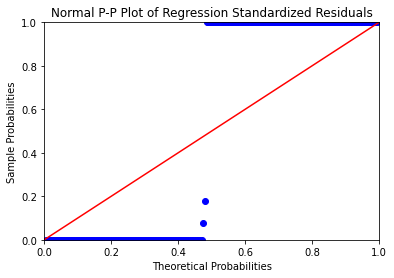

In [14]:
#step 16 Check for normal distribution of error
hdfc_resid=hdfc_lm.resid
probplot=sm.ProbPlot(hdfc_resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title("Normal P-P Plot of Regression Standardized Residuals")
plt.show()
#Straight line indicates cummulative Normal Distribution
#Doted line indicates cummulative Distribution of error
# DOts are closer to the straight line which indicates that res follows normids

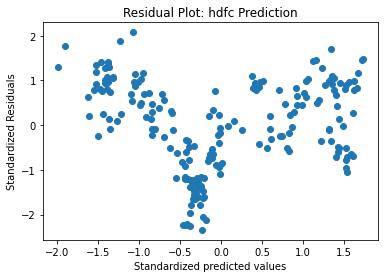

In [15]:
# Step 17 Test of Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter( get_standardized_values( hdfc_lm.fittedvalues ),
    get_standardized_values( hdfc_resid ) )
plt.title( "Residual Plot: hdfc Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");


In [16]:
#step 18 outlier detection using Zscore
from scipy.stats import zscore

In [17]:
Stock_df['z_score_hdfc']=zscore(Stock_df.hdfc)

In [18]:
Stock_df[(Stock_df.z_score_hdfc > 3.0)|(Stock_df.z_score_hdfc < -3.0)]

,Date,hdfc,asian paint,Nifty,z_score_hdfc


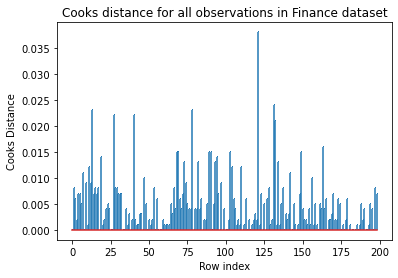

In [19]:
# Step 19 Outlier Detection using cook distance #
import numpy as np
hdfc_influence = hdfc_lm.get_influence() 
(c, p) = hdfc_influence.cooks_distance 
plt.stem( np.arange( len(train_X) ), 
np.round( c, 3), 
markerfmt=","); 
plt.title("Cooks distance for all observations in Finance dataset"); 
plt.xlabel("Row index") 
plt.ylabel("Cooks Distance");

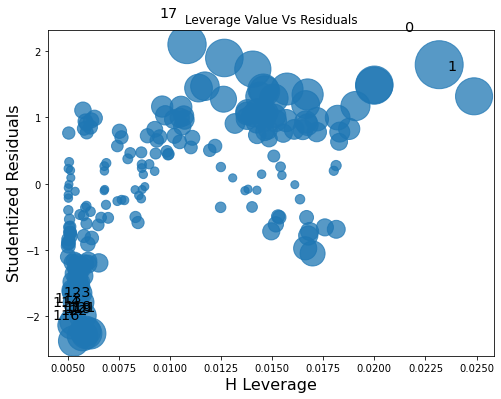

In [20]:
# Step 20 Outlier Detection using Leverage #
from statsmodels.graphics.regressionplots import influence_plot 
fig, ax = plt.subplots( figsize=(8,6)) 
influence_plot(hdfc_lm, ax = ax) 
plt.title("Leverage Value Vs Residuals") 
plt.show();


In [21]:
#step 21 predicting on validation set
pred_y=hdfc_lm.predict(test_X)

In [22]:
# Step 22  Strength of relatinship using R Square and error #
#Finding R-Square and RMSE#
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
np.abs(r2_score(test_y,pred_y))

0.9199138769146527

In [24]:
import numpy as np

In [25]:
#finding root mean square error
np.sqrt(mean_squared_error(test_y,pred_y))

113.16056040424702

In [26]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
# Predict the y values
pred_y = hdfc_lm.predict(test_X ) 
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( hdfc_lm,test_X,alpha = 0.1) 
# Store all the values in a dataframe
pred_y_df = pd.DataFrame({'Nifty Closing': test_X['Nifty'], 
'pred_y': pred_y, 
'pred_y_left': pred_y_low, 
'pred_y_right': pred_y_high })

In [27]:
pred_y_df[0:10]

,Nifty Closing,pred_y,pred_y_left,pred_y_right
65,10813.45,1859.211624,1672.206918,2046.216331
59,10430.05,1788.092358,1600.961962,1975.222754
194,14484.75,2540.224047,2352.591582,2727.856511
112,11440.05,1975.443581,1788.566487,2162.320676
192,14137.35,2475.782646,2288.351286,2663.214005
169,13258.55,2312.768532,2125.714179,2499.822884
152,12631.10,2196.378903,2009.477731,2383.280074
203,14371.90,2519.290794,2331.726882,2706.854705
214,15109.30,2656.075736,2468.007939,2844.143534
173,13478.30,2353.531335,2166.400456,2540.662214
